In [165]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize

# 1 Consumir Dados da url

In [132]:
#Parametros
#qtd 'n' de linhas (registros)

In [166]:
qtd =500
url = "https://randomuser.me/api/?results={}".format(qtd)

In [167]:
#coletar dados da API

In [168]:
dft = requests.get(url)

In [169]:
x = dft.json()

In [170]:
df = pd.DataFrame(x['results'])

In [138]:
data = json.dumps(x)

# 2 Armazenar dados em CSV

In [139]:
#desmembrando subsets name, location, login, dob, registred, id, picture

In [171]:
dfname =pd.json_normalize(df['name'])
dfloc =pd.json_normalize(df['location'])
dflogin =pd.json_normalize(df['login'])
dfdob =pd.json_normalize(df['dob'])

In [141]:
dfreg =pd.json_normalize(df['registered'])
dfid =pd.json_normalize(df['id'])
dfpict =pd.json_normalize(df['picture'])

In [149]:
dfcsv=pd.concat([df['gender'],dfname,dfloc,df['email'],dflogin,dfdob,df['phone'],df['cell'],dfreg,dfid,dfpict,df['nat']],axis=1)

In [150]:
dfcsv.head(5)

,gender,title,first,last,city,state,country,postcode,street.number,street.name,...,phone,cell,date,age,name,value,large,medium,thumbnail,nat
0,male,Mr,Dani,Chan,Blomvåg,Nordland,Norway,5237,6130,Arups gate,...,65760138,45229862,2010-04-25T11:14:55.864Z,12,FN,31016131914,https://randomuser.me/api/portraits/men/91.jpg,https://randomuser.me/api/portraits/med/men/91...,https://randomuser.me/api/portraits/thumb/men/...,NO
1,male,Mr,اميرعلي,سهيلي راد,سیرجان,لرستان,Iran,41813,2721,میدان جمهوری,...,086-28356094,0977-417-3304,2003-07-30T01:58:52.003Z,19,,None,https://randomuser.me/api/portraits/men/0.jpg,https://randomuser.me/api/portraits/med/men/0.jpg,https://randomuser.me/api/portraits/thumb/men/...,IR
2,female,Mrs,Anna,Cole,Exeter,Berkshire,United Kingdom,S14 5NS,2955,Park Avenue,...,015396 43390,07955 549750,2012-12-26T19:23:46.020Z,10,NINO,LA 86 20 99 D,https://randomuser.me/api/portraits/women/40.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,GB
3,female,Mrs,Hanne-Lore,Kindermann,Röthenbach an der Pegnitz,Thüringen,Germany,70456,8916,Erlenweg,...,0409-4773701,0171-5252396,2011-07-29T12:38:10.839Z,11,SVNR,59 150296 K 903,https://randomuser.me/api/portraits/women/70.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,DE
4,male,Mr,Jacob,Olsen,Hornbæk,Midtjylland,Denmark,97352,5550,Bekkasinvej,...,35224062,49835117,2008-01-13T22:12:14.802Z,15,CPR,170151-0609,https://randomuser.me/api/portraits/men/59.jpg,https://randomuser.me/api/portraits/med/men/59...,https://randomuser.me/api/portraits/thumb/men/...,DK


In [151]:
dfcsv.to_csv('randomuser.csv', sep=',', encoding='utf-8')

# 3 Formato de telefone e celular, transformá-los para um formato único, escolhido arbitrariamente

In [152]:
#retirando de phone caracteres 'espaço' ( - )
p = df['phone'].replace('\(','',regex=True)
p = p.replace(' ','',regex=True)
p = p.replace('\)','',regex=True)
p = p.replace('-','',regex=True)
# substituindo phone com novo formato
df['phone'] = '(' + p.str[:3] + ')' + p.str[3:6] + '-' + p.str[6:11]

In [153]:
 '(' + p.str[:3] + ')' + p.str[3:6] + '-' + p.str[6:11]

0       (657)601-38
1    (086)283-56094
2    (015)396-43390
3    (040)947-73701
4       (352)240-62
Name: phone, dtype: object

# 4 Agrupamento, porcentagem de usuários por país e gênero

<AxesSubplot:ylabel='city'>

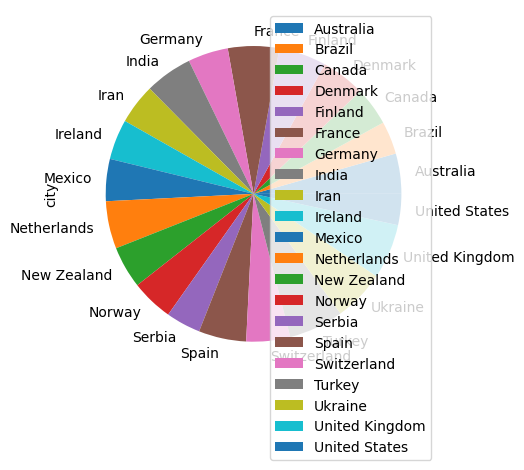

In [99]:
dfloc.groupby(['country']).count().plot(y='city',kind='pie')

In [172]:
ctr=dfloc.groupby(['country','state']).count()

In [173]:
ctr.apply(lambda x:100 * x / float(x.sum()))

city  postcode  street.number  \
country       state                                                         
Australia     Australian Capital Territory   0.6       0.6            0.6   
              New South Wales                0.6       0.6            0.6   
              Northern Territory             1.4       1.4            1.4   
              Queensland                     0.6       0.6            0.6   
              South Australia                0.6       0.6            0.6   
...                                          ...       ...            ...   
United States New York                       0.4       0.4            0.4   
              North Dakota                   0.2       0.2            0.2   
              South Carolina                 0.4       0.4            0.4   
              Texas                          0.2       0.2            0.2   
              Wisconsin                      0.4       0.4            0.4   

                                            street.name  coordinates.latitude  \
country       state                                                             
Australia     Australian Capital Territory          0.6                   0.6   
              New South Wales                       0.6                   0.6   
              Northern Territory                    1.4                   1.4   
              Queensland                            0.6                   0.6   
              South Australia                       0.6                   0.6   
...                                                 ...                   ...   
United States New York                              0.4                   0.4   
              North Dakota                          0.2                   0.2   
              South Carolina                        0.4                   0.4   
              Texas                                 0.2                   0.2   
              Wisconsin                             0.4                   0.4   

                                            coordinates.longitude  \
country       state                                                 
Australia     Australian Capital Territory                    0.6   
              New South Wales                                 0.6   
              Northern Territory                              1.4   
              Queensland                                      0.6   
              South Australia                                 0.6   
...                                                           ...   
United States New York                                        0.4   
              North Dakota                                    0.2   
              South Carolina                                  0.4   
              Texas                                           0.2   
              Wisconsin                                       0.4   

                                            timezone.offset  \
country       state                                           
Australia     Australian Capital Territory              0.6   
              New South Wales                           0.6   
              Northern Territory                        1.4   
              Queensland                                0.6   
              South Australia                           0.6   
...                                                     ...   
United States New York                                  0.4   
              North Dakota                              0.2   
              South Carolina                            0.4   
              Texas                                     0.2   
              Wisconsin                                 0.4   

                                            timezone.description  
country       state                                               
Australia     Australian Capital Territory                   0.6  
              New South Wales                                0.6  
  

In [160]:
#Agrupamento por gênero

In [174]:
#ordenar e contar por gênero
dfsex=df.sort_values(['gender'])
sex=dfsex.groupby(df['gender']).agg({'name':'count'})

In [175]:
sex.apply(lambda x:100 * x / float(x.sum()))

,name
gender,
female,49.8
male,50.2


<AxesSubplot:ylabel='name'>

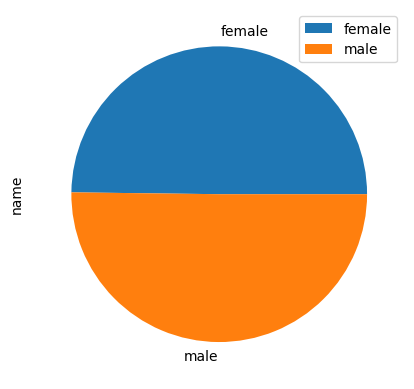

In [177]:
dfsex.groupby(['gender']).count().plot(y='name',kind='pie')

# Total do Brazil e demais países

In [183]:
dfbr = dfloc.query("country=='Brazil'")
#dfbr = dfloc.filter(like='Brazil',axis=0)


In [187]:
dfbr.groupby(['country','state']).sum()

street.number
country state                            
Brazil  Amapá                        7558
        Amazonas                     9529
        Espírito Santo               7412
        Mato Grosso do Sul          11971
        Minas Gerais                 8093
        Paraná                       2041
        Paraíba                        76
        Pará                         1770
        Pernambuco                   2051
        Rondônia                     9002
        Roraima                      6213
        Santa Catarina              14028
        Sergipe                       118
        São Paulo                    9075

In [179]:
dfloc.groupby(['country']).sum()

,street.number
country,
Australia,113045
Brazil,88937
Canada,135161
Denmark,185418
Finland,120864
France,107936
Germany,71050
India,160174
Iran,116498


In [71]:
city.apply(lambda x:100 * x / float(x.sum()))

,name
nat,
AU,4.6
BR,3.2
CA,6.4
CH,5.0
DE,4.6
DK,4.6
ES,5.2
FI,2.8
FR,4.6
